In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd
from scipy.ndimage.filters import gaussian_filter1d

/var/folders/cg/6bd366p92fbb82w4cdb91yd40000gn/T/ipykernel_90489/2216789958.py:5: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [84]:
adversarial = "datasets/processed/results/adversarial.csv"
baseline = "datasets/processed/results/baseline.csv"
monthly = "datasets/processed/results/monthly.csv"

In [85]:
def get_df(path):
    df = pd.read_csv(path)
    df["last_month"] = df["last_month"].astype("str")
    df["last_month_date"] =df["last_month"].apply(lambda x: x[0:4] + "-"+ x[4:6] + "-01")
    df["last_month_date"] = df["last_month_date"].astype("datetime64[ns]")
    
    
    df['last_month_date'] = pd.to_datetime(df['last_month_date'], format="%Y%m") + MonthEnd(0)
    df = df.sort_values(by="last_month_date").reset_index(drop=True)
    
    return df

In [86]:
df_adv = get_df(adversarial)
df_base = get_df(baseline)
df_monthly = get_df(monthly)

In [87]:
df_base["stage"] = df_base["stage"].map({
    "baseline": "All features",
    "baseline_sin_foto_mes": "No foto_mes",
})

In [238]:
df_base.head()

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,real_binaria_accuracy_score,real_binaria_example_count,...,real_ternaria_f1_score,real_ternaria_false_negatives,real_ternaria_false_positives,real_ternaria_precision_score,real_ternaria_recall_score,real_ternaria_true_negatives,real_ternaria_true_positives,stage,last_month,last_month_date
0,2023-11-15 23:36:41,1.9min,29d4572d777949f38e387ee4b1319ce9,rumbling-fish-635,LOCAL,/home/jauriberamirez/.local/lib/python3.10/sit...,jauriberamirez,FINISHED,0.871331,163637.0,...,0.077795,256.0,21390.0,0.040936,0.781009,141078.0,913.0,No foto_mes,202104,2021-04-30
1,2023-11-15 22:52:20,1.8min,da7305614e004dd49d7c2d5b0c135a4f,hilarious-frog-794,LOCAL,/home/jauriberamirez/.local/lib/python3.10/sit...,jauriberamirez,FINISHED,0.842083,163637.0,...,0.066159,230.0,26278.0,0.034500,0.803251,136190.0,939.0,All features,202104,2021-04-30
2,2023-11-15 23:40:00,2.0min,91589fe183a242efa4d59569964ea47b,clumsy-auk-245,LOCAL,/home/jauriberamirez/.local/lib/python3.10/sit...,jauriberamirez,FINISHED,0.877351,164102.0,...,0.059954,236.0,20649.0,0.031246,0.738359,142551.0,666.0,No foto_mes,202105,2021-05-31
3,2023-11-15 22:55:33,2.0min,d8963265d4194958a96bfa8d167375d5,defiant-trout-706,LOCAL,/home/jauriberamirez/.local/lib/python3.10/sit...,jauriberamirez,FINISHED,0.845840,164102.0,...,0.050200,211.0,25937.0,0.025950,0.766075,137263.0,691.0,All features,202105,2021-05-31
4,2023-11-15 23:43:25,1.8min,198e9b7af23a47a5bc7b42950e44e651,peaceful-ape-929,LOCAL,/home/jauriberamirez/.local/lib/python3.10/sit...,jauriberamirez,FINISHED,0.878415,164420.0,...,0.072939,265.0,20300.0,0.038325,0.753259,143046.0,809.0,No foto_mes,202106,2021-06-30


In [88]:
df_monthly["stage"] = df_monthly["stage"].map({
    "monthly": "All features",
    "monthly_sin_foto_mes": "No foto_mes",
})

In [89]:
df_adv["stage"] = df_adv["stage"].map({
    "adversarial": "All features - stacked",
    "adversarial_sin_foto_mes": "No foto_mes - stacked",
    "adversarial_only_last": "All features - last month",
    "adversarial_only_last_sin_foto_mes": "No foto_mes - last month",
})

## Baseline vs Monthly

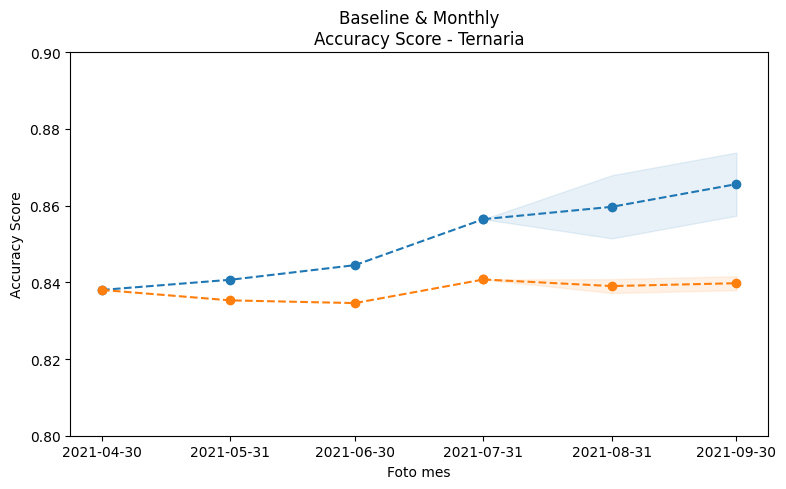

In [234]:
fig = plt.figure(figsize=(8, 5))

metric = "real_ternaria_accuracy_score"

df_temp_1 = df_base[df_base["stage"].isin(["All features"])]
df_temp_2 = df_monthly[df_monthly["stage"].isin(["All features"])]
df_temp_2.iloc[0] = df_temp_1.iloc[0]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = np.array([0,1,1])
ci = ci*(1.96 * np.std(y)/np.sqrt(len(x)))

plt.plot(df_temp_1["last_month_date"], df_temp_1[metric], 'o--', label="Baseline", color="C0")
x = x[-3:]
y = y[-3:]
plt.plot(x,y, 'o--', color="C0")
plt.fill_between(x, np.subtract(y,ci), np.add(y,ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = np.array([0,1,1])
ci = ci*(1.96 * np.std(y)/np.sqrt(len(x)))

plt.plot(df_temp_2["last_month_date"], df_temp_2[metric], 'o--', label="Monthly", color="C1")
x = x[-3:]
y = y[-3:]
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, np.subtract(y,ci), np.add(y,ci), alpha=.1, color="C1")

plt.title("Baseline & Monthly\nAccuracy Score - Ternaria")
plt.xticks(df_base["last_month_date"].unique())
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0.8, .9)
plt.xlabel("Foto mes")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

fig.savefig("images/baseline_vs_monthly_ternaria.png", transparent=True, bbox_inches='tight')

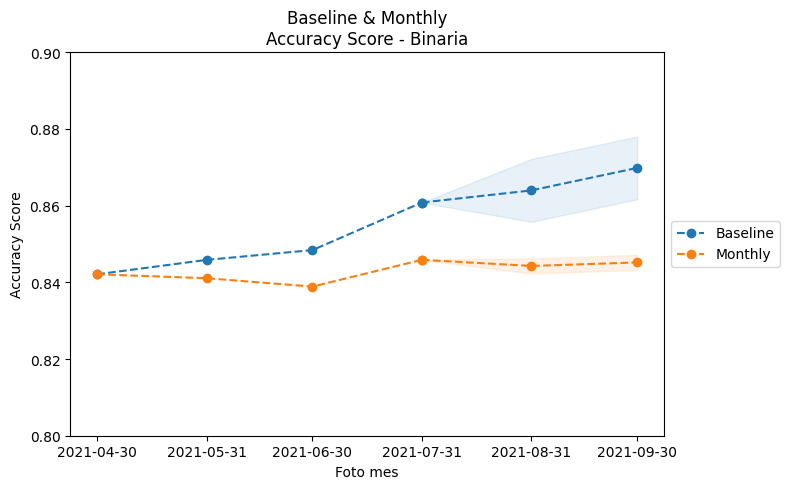

In [237]:
fig = plt.figure(figsize=(8, 5))

metric = "real_binaria_accuracy_score"

df_temp_1 = df_base[df_base["stage"].isin(["All features"])]
df_temp_2 = df_monthly[df_monthly["stage"].isin(["All features"])]
df_temp_2.iloc[0] = df_temp_1.iloc[0]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = np.array([0,1,1])
ci = ci*(1.96 * np.std(y)/np.sqrt(len(x)))

plt.plot(df_temp_1["last_month_date"], df_temp_1[metric], 'o--', label="Baseline", color="C0")
x = x[-3:]
y = y[-3:]
plt.plot(x,y, 'o--', color="C0")
plt.fill_between(x, np.subtract(y,ci), np.add(y,ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = np.array([0,1,1])
ci = ci*(1.96 * np.std(y)/np.sqrt(len(x)))

plt.plot(df_temp_2["last_month_date"], df_temp_2[metric], 'o--', label="Monthly", color="C1")
x = x[-3:]
y = y[-3:]
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, np.subtract(y,ci), np.add(y,ci), alpha=.1, color="C1")

plt.title("Baseline & Monthly\nAccuracy Score - Binaria")
plt.xticks(df_base["last_month_date"].unique())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0.8, .9)
plt.xlabel("Foto mes")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

fig.savefig("images/baseline_vs_monthly_binaria.png", transparent=True, bbox_inches='tight')

### Baseline

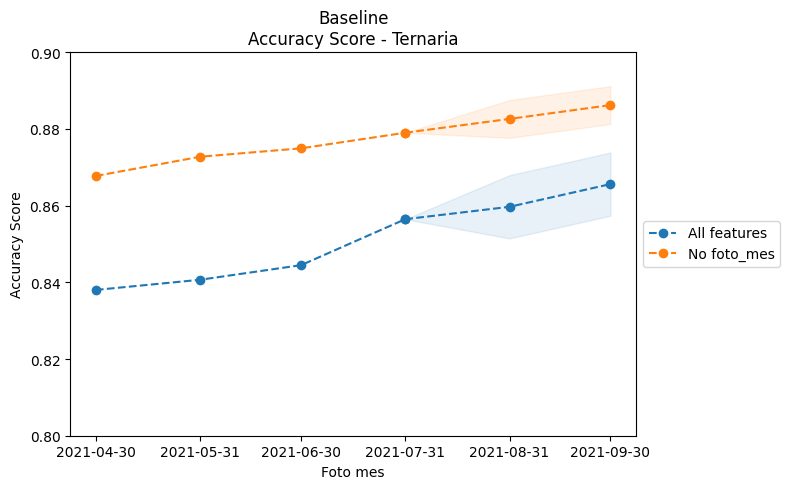

In [224]:
fig = plt.figure(figsize=(8, 5))

metric = "real_ternaria_accuracy_score"

df_temp_1 = df_base[df_base["stage"].isin(["All features"])]
df_temp_2 = df_base[df_base["stage"].isin(["No foto_mes"])]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = np.array([0,1,1])
ci = ci*(1.96 * np.std(y)/np.sqrt(len(x)))

plt.plot(df_temp_1["last_month_date"], df_temp_1[metric], 'o--', label="All features", color="C0")
x = x[-3:]
y = y[-3:]
plt.plot(x,y, 'o--', color="C0")
plt.fill_between(x, np.subtract(y,ci), np.add(y,ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = np.array([0,1,1])
ci = ci*(1.96 * np.std(y)/np.sqrt(len(x)))

plt.plot(df_temp_2["last_month_date"], df_temp_2[metric], 'o--', label="No foto_mes", color="C1")
x = x[-3:]
y = y[-3:]
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, np.subtract(y,ci), np.add(y,ci), alpha=.1, color="C1")

plt.title("Baseline\nAccuracy Score - Ternaria")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(df_base["last_month_date"].unique())
plt.ylim(0.8, .9)
plt.xlabel("Foto mes")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

fig.savefig("images/baseline_ternaria.png", transparent=True, bbox_inches='tight')

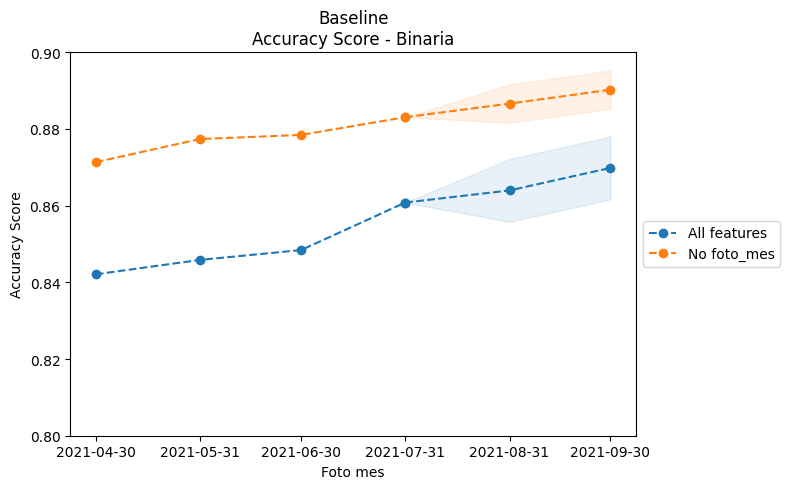

In [227]:
fig = plt.figure(figsize=(8, 5))

metric = "real_binaria_accuracy_score"

df_temp_1 = df_base[df_base["stage"].isin(["All features"])]
df_temp_2 = df_base[df_base["stage"].isin(["No foto_mes"])]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = np.array([0,1,1])
ci = ci*(1.96 * np.std(y)/np.sqrt(len(x)))

plt.plot(df_temp_1["last_month_date"], df_temp_1[metric], 'o--', label="All features", color="C0")
x = x[-3:]
y = y[-3:]
plt.plot(x,y, 'o--', color="C0")
plt.fill_between(x, np.subtract(y,ci), np.add(y,ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = np.array([0,1,1])
ci = ci*(1.96 * np.std(y)/np.sqrt(len(x)))

plt.plot(df_temp_2["last_month_date"], df_temp_2[metric], 'o--', label="No foto_mes", color="C1")
x = x[-3:]
y = y[-3:]
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, np.subtract(y,ci), np.add(y,ci), alpha=.1, color="C1")

plt.title("Baseline\nAccuracy Score - Binaria")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(df_base["last_month_date"].unique())
plt.ylim(0.8, .9)
plt.xlabel("Foto mes")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

fig.savefig("images/baseline_binaria.png", transparent=True, bbox_inches='tight')

#### Monthly

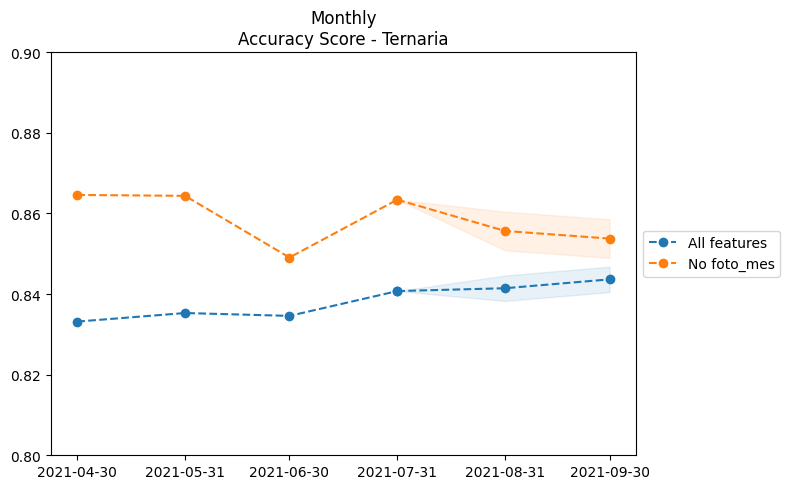

In [228]:
fig = plt.figure(figsize=(8, 5))

metric = "real_ternaria_accuracy_score"

df_temp_1 = df_monthly[df_monthly["stage"].isin(["All features"])]
df_temp_2 = df_monthly[df_monthly["stage"].isin(["No foto_mes"])]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = np.array([0,1,1])
ci = ci*(1.96 * np.std(y)/np.sqrt(len(x)))

plt.plot(df_temp_1["last_month_date"], df_temp_1[metric], 'o--', label="All features", color="C0")
x = x[-3:]
y = y[-3:]
plt.plot(x,y, 'o--', color="C0")
plt.fill_between(x, np.subtract(y,ci), np.add(y,ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = np.array([0,1,1])
ci = ci*(1.96 * np.std(y)/np.sqrt(len(x)))

plt.plot(df_temp_2["last_month_date"], df_temp_2[metric], 'o--', label="No foto_mes", color="C1")
x = x[-3:]
y = y[-3:]
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, np.subtract(y,ci), np.add(y,ci), alpha=.1, color="C1")

plt.title("Monthly\nAccuracy Score - Ternaria")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(df_monthly["last_month_date"].unique())
plt.ylim(0.8, .9)
plt.tight_layout()
plt.show()

fig.savefig("images/monthly_ternaria.png", transparent=True, bbox_inches='tight')

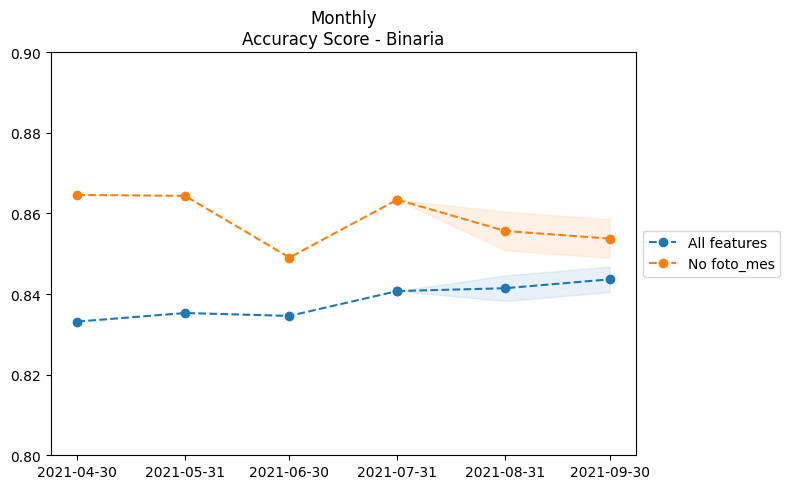

In [229]:
fig = plt.figure(figsize=(8, 5))

metric = "real_ternaria_accuracy_score"

df_temp_1 = df_monthly[df_monthly["stage"].isin(["All features"])]
df_temp_2 = df_monthly[df_monthly["stage"].isin(["No foto_mes"])]

x = df_temp_1["last_month_date"]
y = df_temp_1[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = np.array([0,1,1])
ci = ci*(1.96 * np.std(y)/np.sqrt(len(x)))

plt.plot(df_temp_1["last_month_date"], df_temp_1[metric], 'o--', label="All features", color="C0")
x = x[-3:]
y = y[-3:]
plt.plot(x,y, 'o--', color="C0")
plt.fill_between(x, np.subtract(y,ci), np.add(y,ci), alpha=.1, color="C0")


x = df_temp_2["last_month_date"]
y = df_temp_2[metric].interpolate(method='spline', order=1, limit_direction="forward")
ci = np.array([0,1,1])
ci = ci*(1.96 * np.std(y)/np.sqrt(len(x)))

plt.plot(df_temp_2["last_month_date"], df_temp_2[metric], 'o--', label="No foto_mes", color="C1")
x = x[-3:]
y = y[-3:]
plt.plot(x,y, 'o--', color="C1")
plt.fill_between(x, np.subtract(y,ci), np.add(y,ci), alpha=.1, color="C1")

plt.title("Monthly\nAccuracy Score - Binaria")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(df_base["last_month_date"].unique())
plt.ylim(0.8, .9)
plt.tight_layout()
plt.show()

fig.savefig("images/monthly_binaria.png", transparent=True, bbox_inches='tight')

### Adversarial

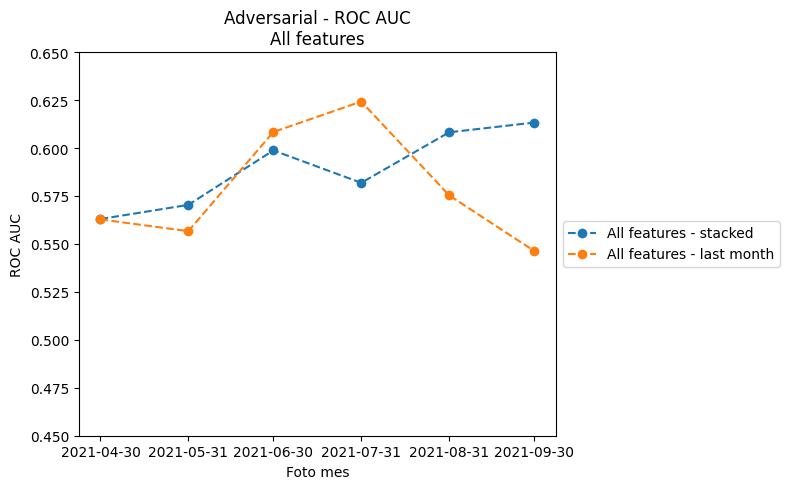

In [232]:
fig = plt.figure(figsize=(8, 5))

df_temp_1 = df_adv[df_adv["stage"].isin(["All features - stacked"])]
df_temp_2 = df_adv[df_adv["stage"].isin(["All features - last month"])]
plt.plot(df_temp_1["last_month_date"], df_temp_1["training_roc_auc"], 'o--', label="All features - stacked")
plt.plot(df_temp_2["last_month_date"], df_temp_2["training_roc_auc"], 'o--', label="All features - last month")
plt.title("Adversarial - ROC AUC\nAll features")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(df_adv["last_month_date"].unique())
plt.ylim(0.45, .65)
plt.xlabel("Foto mes")
plt.ylabel("ROC AUC")
plt.tight_layout()
plt.show()

fig.savefig("images/adversarial.png", transparent=True, bbox_inches='tight')

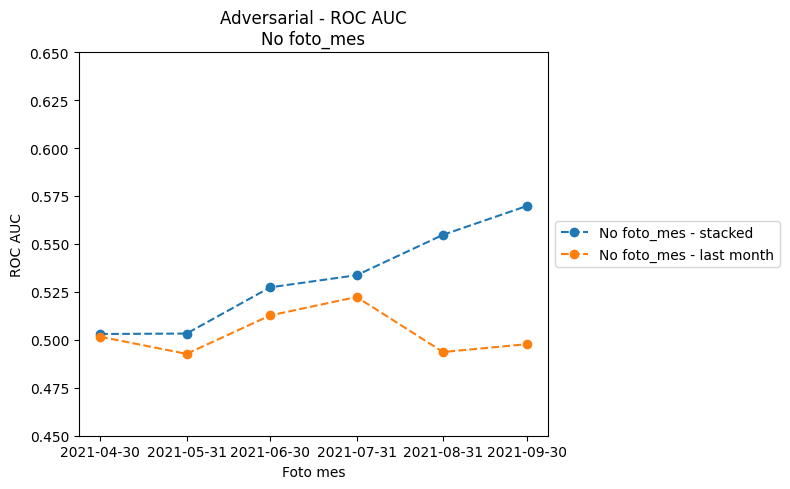

In [233]:
fig = plt.figure(figsize=(8, 5))

df_temp_1 = df_adv[df_adv["stage"].isin(["No foto_mes - stacked"])]
df_temp_2 = df_adv[df_adv["stage"].isin(["No foto_mes - last month"])]
plt.plot(df_temp_1["last_month_date"], df_temp_1["training_roc_auc"], 'o--', label="No foto_mes - stacked")
plt.plot(df_temp_2["last_month_date"], df_temp_2["training_roc_auc"], 'o--', label="No foto_mes - last month")
plt.title("Adversarial - ROC AUC\nNo foto_mes")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0.45, .65)
plt.xticks(df_adv["last_month_date"].unique())
plt.xlabel("Foto mes")
plt.ylabel("ROC AUC")
plt.tight_layout()
plt.show()

fig.savefig("images/adversarial_sin_foto_mes.png", transparent=True, bbox_inches='tight')

### Ganancia

In [365]:
df_gan = pd.read_parquet("datasets/processed/ganancia_maxima.parquet")

In [366]:
df_gan

,foto_mes,foto_mes_date,ganancia_maxima
0,201901,2019-01-01,193320000.0
1,201902,2019-02-01,184680000.0
2,201903,2019-03-01,197100000.0
3,201904,2019-04-01,140130000.0
4,201905,2019-05-01,183600000.0
5,201906,2019-06-01,157680000.0
6,201907,2019-07-01,167130000.0
7,201908,2019-08-01,154710000.0
8,201909,2019-09-01,147960000.0
9,201910,2019-10-01,174690000.0


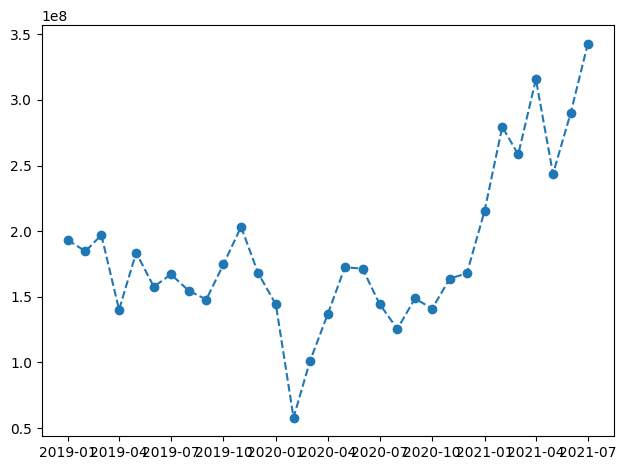

In [300]:
plt.plot(df_gan["foto_mes_date"], df_gan["ganancia_maxima"], 'o--')
plt.tight_layout()

In [301]:
import glob

In [302]:
baseline_preds = {
    "all_features":  glob.glob("datasets/processed/predictions/baseline/all_features/*.csv"),
    "no_foto_mes": glob.glob("datasets/processed/predictions/baseline/no_foto_mes/*.csv")
}

In [303]:
monthly_preds = {
    "all_features":  glob.glob("datasets/processed/predictions/monthly/all_features/*.csv"),
    "no_foto_mes": glob.glob("datasets/processed/predictions/monthly/no_foto_mes/*.csv")
}

In [312]:
for k,v in monthly_preds.items():
    print(k)
    for file in v:
        print(file)
        for cut  in [9000, 9500, 10000, 10500, 11000]:
            print(cut)

all_features
datasets/processed/predictions/monthly/all_features/preds_202104.csv
9000
9500
10000
10500
11000
datasets/processed/predictions/monthly/all_features/preds_202105.csv
9000
9500
10000
10500
11000
datasets/processed/predictions/monthly/all_features/preds_202107.csv
9000
9500
10000
10500
11000
datasets/processed/predictions/monthly/all_features/preds_202106.csv
9000
9500
10000
10500
11000
no_foto_mes
datasets/processed/predictions/monthly/no_foto_mes/preds_202107_sin_foto_mes.csv
9000
9500
10000
10500
11000
datasets/processed/predictions/monthly/no_foto_mes/preds_202106_sin_foto_mes.csv
9000
9500
10000
10500
11000
datasets/processed/predictions/monthly/no_foto_mes/preds_202105_sin_foto_mes.csv
9000
9500
10000
10500
11000
datasets/processed/predictions/monthly/no_foto_mes/preds_202104_sin_foto_mes.csv
9000
9500
10000
10500
11000


In [363]:
df_gan_ = df_gan.copy()
ganancias = []
for features,files in monthly_preds.items():
    for file in files:
        df_preds_ = pd.read_csv(file)
        df_preds_ = df_preds_.sort_values(by="prediction", ascending=False, ignore_index=True)
        df_preds = df_preds_[["foto_mes", "ganancia"]].copy()
    
        for cut in [9000, 9500, 10000, 10500, 11000]:
            df_preds.loc[0:cut, "Predicted"] = 1
            df_preds.loc[cut:, "Predicted"] = 0
            df_preds[f"gan_total_monthly_{features}_{cut}"] = df_preds["Predicted"] * df_preds["ganancia"] 
            
        ganancias.append(df_preds[["foto_mes", f"gan_total_monthly_{features}_{cut}"]].groupby("foto_mes", as_index=False).sum())
    df_ganancias = pd.concat(ganancias, ignore_index=True).groupby("foto_mes").sum()
    df_gan_ = df_gan_.merge(df_ganancias, on="foto_mes", how="left")

In [364]:
df_gan_

,foto_mes,foto_mes_date,ganancia_maxima,gan_total_monthly_all_features_11000_x,gan_total_monthly_all_features_11000_y,gan_total_monthly_no_foto_mes_11000
0,201901,2019-01-01,193320000.0,NaN,NaN,NaN
1,201902,2019-02-01,184680000.0,NaN,NaN,NaN
2,201903,2019-03-01,197100000.0,NaN,NaN,NaN
3,201904,2019-04-01,140130000.0,NaN,NaN,NaN
4,201905,2019-05-01,183600000.0,NaN,NaN,NaN
5,201906,2019-06-01,157680000.0,NaN,NaN,NaN
6,201907,2019-07-01,167130000.0,NaN,NaN,NaN
7,201908,2019-08-01,154710000.0,NaN,NaN,NaN
8,201909,2019-09-01,147960000.0,NaN,NaN,NaN
9,201910,2019-10-01,174690000.0,NaN,NaN,NaN


In [362]:
df_gan_.drop(columns=["ganancia_maxima"], inplace=True)

In [245]:
df_preds = df_preds.sort_values(by="prediction", ascending=False, ignore_index=True)

In [255]:
df_preds.loc[0:9500, "Predicted"] = 1
df_preds.loc[9500:, "Predicted"] = 0

In [256]:
df_preds["gan_total"] = df_preds["Predicted"] * df_preds["ganancia"] 

In [257]:
df_preds["gan_total"].sum()/315630000.0

0.4264550264550265